In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def newtonschulz5(G, steps=5, eps=1e-7):
    assert G.ndim == 2
    a, b, c = (3.4445, -4.7750, 2.0315)
    X = G / (G.norm() + eps)
    if G.size(0) > G.size(1):
        X = X.T
    for _ in range(steps):
        A = X @ X.T
        B = b * A + c * A @ A
        X = a * X + B @ X
    if G.size(0) > G.size(1):
        X = X.T
    return X

# 2D Visualization

Sample random Nx2 matrices and visualize how Muon transforms them.

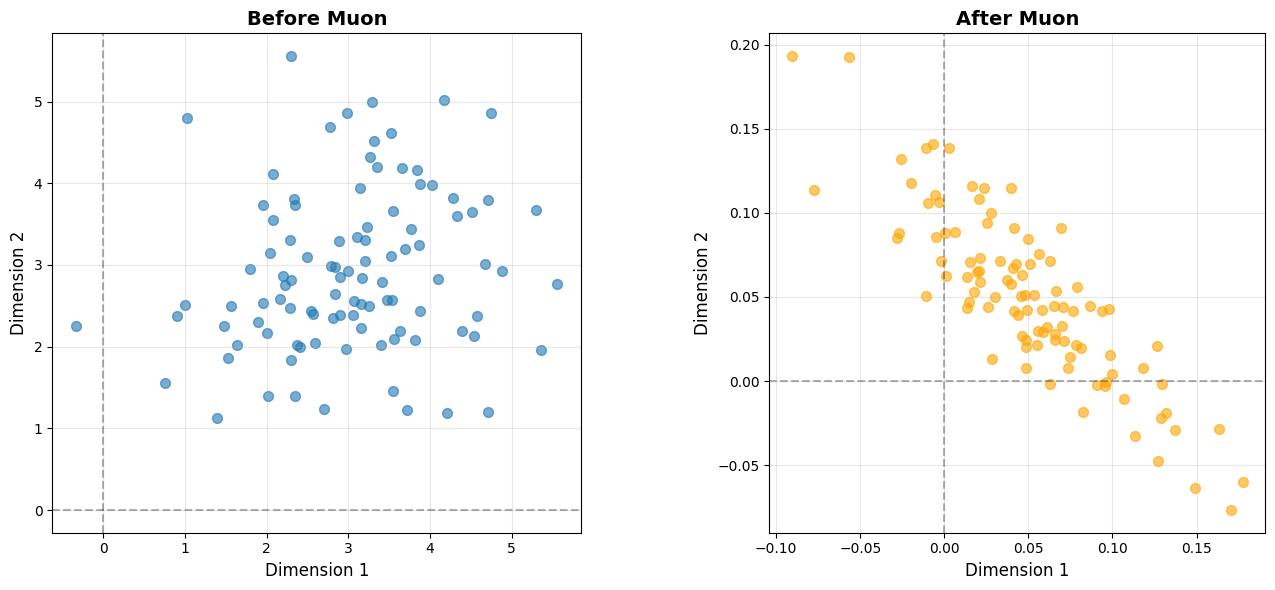

Before Muon - Mean: [3.0347598 2.915903 ], Std: [1.0754977 0.9769588]
After Muon  - Mean: [0.04980249 0.04956022], Std: [0.05003166 0.04995951]
Frobenius norm before: 44.5235
Frobenius norm after:  0.9968


In [7]:
def visualize_2d_transformation(pertubation=[0.0, 0.0],N=50, seed=42):
    """
    Visualize how Muon transforms a random Nx2 matrix.
    Each row represents a 2D point.
    
    Args:
        N: Number of points
        seed: Random seed for reproducibility
    """
    torch.manual_seed(seed)
    np.random.seed(seed)
    
    # Sample random Nx2 matrix
    G = torch.randn(N, 2, dtype=torch.float32) + torch.tensor(pertubation)
    
    # Apply Muon
    G_muon = newtonschulz5(G)
    
    # Convert to numpy for plotting
    G_np = G.numpy()
    G_muon_np = G_muon.numpy()
    
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Before
    axes[0].scatter(G_np[:, 0], G_np[:, 1], alpha=0.6, s=50)
    axes[0].set_title('Before Muon', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Dimension 1', fontsize=12)
    axes[0].set_ylabel('Dimension 2', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
    axes[0].set_aspect('equal')
    
    # After
    axes[1].scatter(G_muon_np[:, 0], G_muon_np[:, 1], alpha=0.6, s=50, color='orange')
    axes[1].set_title('After Muon', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Dimension 1', fontsize=12)
    axes[1].set_ylabel('Dimension 2', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
    axes[1].set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"Before Muon - Mean: {G_np.mean(axis=0)}, Std: {G_np.std(axis=0)}")
    print(f"After Muon  - Mean: {G_muon_np.mean(axis=0)}, Std: {G_muon_np.std(axis=0)}")
    print(f"Frobenius norm before: {np.linalg.norm(G_np):.4f}")
    print(f"Frobenius norm after:  {np.linalg.norm(G_muon_np):.4f}")

# Run visualization
visualize_2d_transformation(pertubation=[3.0, 3.0], N=100, seed=1)

# 3D Visualization (Interactive with Plotly)

Sample random Nx3 matrices and create interactive 3D visualizations.

In [19]:
def visualize_3d_transformation(pertubation=[0.0, 0.0, 0.0], sigmas=[1.0, 1.0, 1.0], N=100, seed=42):
    """
    Create interactive 3D visualization of Muon transformation using Plotly.
    Each row represents a 3D point.
    
    Args:
        N: Number of points
        seed: Random seed for reproducibility
    """
    torch.manual_seed(seed)
    np.random.seed(seed)
    
    # Sample random Nx3 matrix
    G = torch.randn(N, 3, dtype=torch.float32) * torch.tensor(sigmas) + torch.tensor(pertubation)
    
    # Apply Muon
    G_muon = newtonschulz5(G)
    
    # Convert to numpy for plotting
    G_np = G.numpy()
    G_muon_np = G_muon.numpy()
    
    # Create subplots with Plotly
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Before Muon', 'After Muon'),
        specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
        horizontal_spacing=0.1
    )
    
    # Before Muon
    fig.add_trace(
        go.Scatter3d(
            x=G_np[:, 0],
            y=G_np[:, 1],
            z=G_np[:, 2],
            mode='markers',
            marker=dict(
                size=5,
                color='blue',
                opacity=0.6
            ),
            name='Before'
        ),
        row=1, col=1
    )
    
    # After Muon
    fig.add_trace(
        go.Scatter3d(
            x=G_muon_np[:, 0],
            y=G_muon_np[:, 1],
            z=G_muon_np[:, 2],
            mode='markers',
            marker=dict(
                size=5,
                color='orange',
                opacity=0.6
            ),
            name='After'
        ),
        row=1, col=2
    )
    
    # Update layout
    fig.update_layout(
        title_text="3D Muon Transformation Visualization (Interactive)",
        title_font_size=16,
        width=1000,
        height=500,
        showlegend=True
    )
    
    fig.show()
    
    # Print statistics
    print(f"\n3D Statistics:")
    print(f"Before Muon - Mean: {G_np.mean(axis=0)}, Std: {G_np.std(axis=0)}")
    print(f"After Muon  - Mean: {G_muon_np.mean(axis=0)}, Std: {G_muon_np.std(axis=0)}")
    print(f"Frobenius norm before: {np.linalg.norm(G_np):.4f}")
    print(f"Frobenius norm after:  {np.linalg.norm(G_muon_np):.4f}")

# Run 3D visualization
visualize_3d_transformation(pertubation=[10.0, 10.0, 10.0], sigmas=[1.0, 1.0, 1.0], N=100, seed=2)


3D Statistics:
Before Muon - Mean: [10.094575   9.9744625 10.041812 ], Std: [1.0524784 0.9499227 0.895398 ]
After Muon  - Mean: [0.03984939 0.04064448 0.04052437], Std: [0.07295779 0.07959817 0.06319617]
Frobenius norm before: 174.6540
Frobenius norm after:  1.4330
